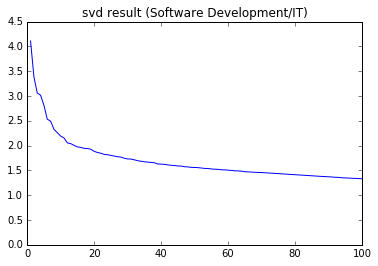

Software Development/IT


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.feature_extraction.text import TfidfVectorizer
from pathlib import Path

categories = ['Software Development/IT']
data_set = {}

def do_svd(category, filenames):
    # for now just do analysis for a few categories
    #if category not in test_set: 
    if category not in categories:
        return
    
    # concatenate the csv files into one dataframe df
    dfs = []
    for filename in filenames:
        df = pd.read_csv(filename)
        dfs.append(df)
    if len(dfs) < 1: return
    df = pd.concat(dfs)
    
    # saving df and svd result into data_set dictionary
    (u, s, vt) = svd(df)
    plt.title("svd result (" + category + ")")
    plt.xlim([0,100])
    plt.plot(range(1,len(s)+1),s)
    plt.show()
    print(category)
    data_set[category] = (df, u, s, vt)
    
def svd(df):
    vectorizer = TfidfVectorizer(stop_words='english', min_df=4,max_df=0.8)
    dtm = vectorizer.fit_transform(df['job_description'].tolist())
    dtm_dense = dtm.todense()
    centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
    u, s, vt = np.linalg.svd(centered_dtm)
    return (u, s, pd.DataFrame(vt,columns = vectorizer.get_feature_names()))

with open('top_cities.csv','r') as src:
    for line in src:
        line = line.split(',')
        # Skips header.
        if line[0] == "job_category": continue
        # Job category
        job_category = line[0].split('/')
        if len(job_category) > 1:
            job_category = '_'.join(job_category)
        else:
            job_category = job_category[0].replace(' ','_')
        filenames = []
        # Top 10 cities
        for i in range(1,11):
            city = line[i*2 -1].replace(' ','').replace('"','')
            filename = "dataset/" + job_category + city + '.csv'
            if Path(filename).is_file():
                #print(filename)
                filenames.append(filename)
        #print(filenames)
        do_svd(line[0], filenames)
        #except: print('pass')

In [5]:
# Need some manual evaluation of the graphs
# to determine the number of principal components

#Trying to be less than 70 on the error graphs.
pc_num_dictionary = {"Accounting/Finance":18, \
                     "Administrative":18, \
                     "Analyst":9, \
                     "Architecture/Drafting":13, \
                     "Art/Design/Entertainment":18,\
                     "Banking/Loan/Insurance":12, \
                     "Beauty/Wellness":10, \
                     "Business Development/Consulting":18, \
                     "Education":18, \
                     "Facilities/General Labor":10, \
                     "Hospitality":18, \
                     "Human Resources":18, \
                     "Installation/Maintenance/Repair":19, \
                     "Legal":14, \
                     "Manufacturing/Production/Construction":18, \
                     "Marketing/Advertising/PR":18, \
                     "Medical/Healthcare":13, \
                     "Product/Project Management":18, \
                     "Real Estate": 16, \
                     "Restaurant/Food Services":18, \
                     "Retail": 18, \
                     "Science/Research": 10, \
                     "Security/Law Enforcement": 6, \
                     "Senior Management": 5, \
                     "Skilled Trade": 5, \
                     "Software Development/IT": 5, \
                     "Sports/Fitness": 7, \
                     "Travel/Transportation": 6, \
                     "Writing/Editing/Publishing": 6
                    }

Analysis for Medical/Healthcare
Principal Components
component_0: business sales management client development services clients project company healthcare
component_1: looking license 00 time brookdale resume san dental paid great
component_2: care brookdale health home clinical residents nursing assistant medication community
component_3: billing coding claims summary collections icd compliance insurance medicare cpt
component_4: brookdale billing residents insurance associates living life older dental benefits
component_5: care health billing home healthcare insurance services hospice practice client
component_6: summary patient patients position equipment service customer surgery technician appointments
component_7: brookdale clinical patient patients practice research office data summary scheduling
component_8: laboratory patient clinical patients research technician equipment lab study testing
component_9: office clinical data research study time work receptionist administrative 0

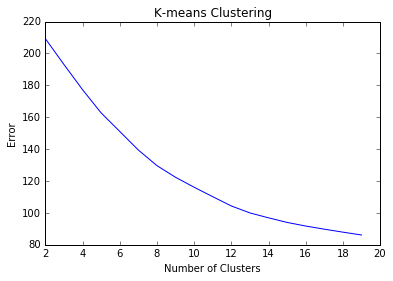

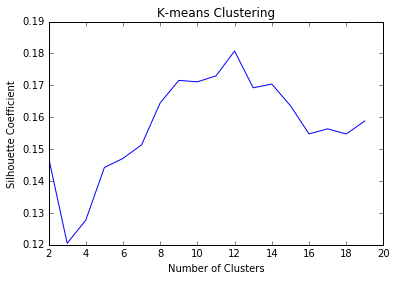



Analysis for Product/Project Management
Principal Components
component_0: description company sales license construction 000 00 school customer job
component_1: product customer sales business products service marketing development customers ability
component_2: construction customer sales customers service skills product design work engineering
component_3: program cost data programs controls budget reports monthly administrative school
component_4: description skills ability required perform general employee essential work duties
component_5: cost product sales customer description schedule budget controls control customers
component_6: customer sales pm license schedule scope dealership risks resolve management
component_7: program construction sales programs company dealership community activities health description
component_8: specialist organizing activities jantec engineering responsible schedule design combination expediting
component_9: product construction ability employee

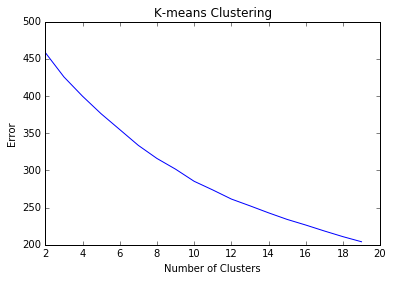

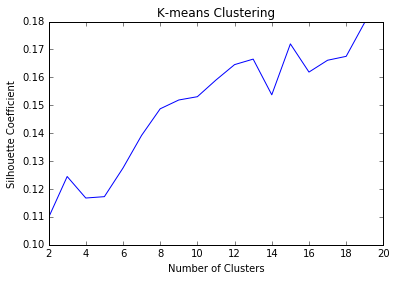



Analysis for Real Estate
Principal Components
component_0: property management accounting manager project tenant construction maintenance lease leasing
component_1: loan project accounting mortgage financial development construction investment finance loans
component_2: license called school job type assistant certification equivalentrequired yearrequired 00
component_3: project marketing development construction team management projects design media manage
component_4: administrative marketing office assistant skills media team social ability work
component_5: loan leasing marketing community project development construction ll residents team
component_6: called ll project construction title insurance design development possess networking
component_7: called ll marketing accounting media social administrative skills financial data
component_8: called ll property loan license management tenant team maintenance home
component_9: accounting title service sales escrow customer team home

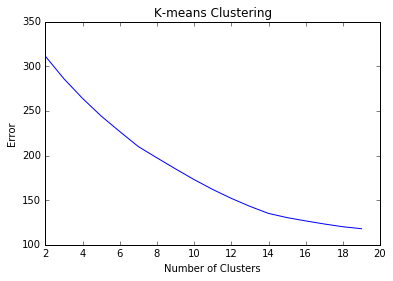

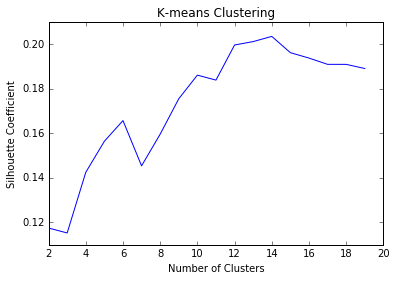



Analysis for Restaurant/Food Services
Principal Components
component_0: hiring street boston cambridge want 00 looking labatt quincy monday
component_1: want maybe crew learn meet team don working mcdonald restaurant
component_2: management sales operations development training years street marketing business boston
component_3: street hiring boston cambridge quincy restaurant avenue able guests drugs
component_4: restaurant license 00 experience high school timesalary customer type yearrequired
component_5: labatt able ability including skills office resumes physical application pounds
component_6: beverage restaurant hiring guest labatt street house guests management amp
component_7: license maybe want driver street certification school food required hiring
component_8: summary position media beverage social overview description license event events
component_9: vending prep illegal drugs failure management including language want cook
component_10: beverage food media customer soc

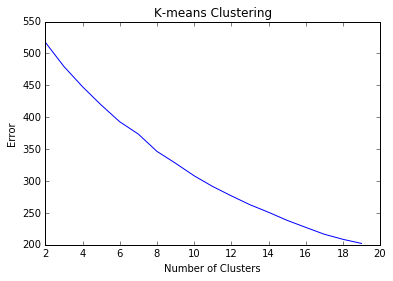

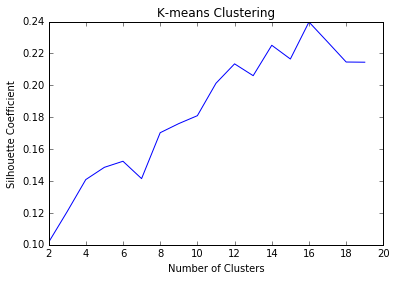



Analysis for Retail
Principal Components
component_0: hiring street avenue san antonio york road west chicago north
component_1: york new avenue street broadway chicago west north east hiring
component_2: chicago north houston vegas las south boulevard street columbus road
component_3: avenue chicago north san west antonio lincoln clark pedro clybourn
component_4: street east chicago san indianapolis antonio west 82nd north clark
component_5: vegas las boulevard south street san antonio denver 7400 east
component_6: houston boulevard broadway drive north colorado st freeway springs chicago
component_7: west houston store vegas las road broadway street north chicago
component_8: houston avenue east denver store drive boulevard hiring merchandise indianapolis
component_9: north broadway east store hiring south chicago colorado boulevard springs
component_10: sales east houston road indianapolis retail 82nd vegas las avenue
component_11: columbus dallas boulevard parkway store polaris m

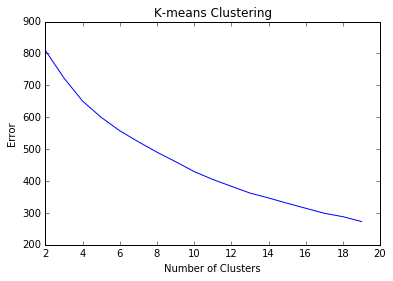

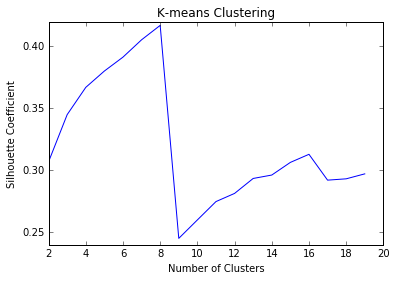



Analysis for Science/Research
Principal Components
component_0: clinical study regulatory site trial monitoring data laboratory medical trials
component_1: data project management business clinical marketing client product research clients
component_2: summary clinical study management site project media program position monitoring
component_3: summary data product business project analysis design development analytics teams
component_4: customer technical project equipment systems laboratory management support service quality
component_5: project media cell marketing summary social communications management ability biology
component_6: research data program students summary grant project projects policy student
component_7: project students development teaching program school tutoring clinical children learning
component_8: research sales clients client market health care quantitative firm consulting
component_9: sales summary laboratory students customer school marketing data medic

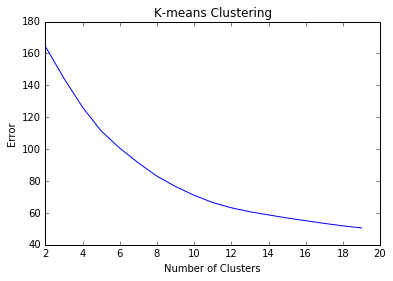

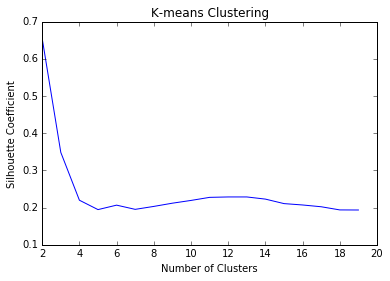



Analysis for Security/Law Enforcement
Principal Components
component_0: guard license school card 00 officers valid equivalentrequired high time
component_1: network information guard systems application data risk server web design
component_2: safety shift duties ability perform required employee functions procedures manager
component_3: shift managers food people manager mcdonald crew summary cleanliness interested
component_4: summary position december november description accepted 2016 14 program reports
component_5: compliance risk information program law client financial clients business services


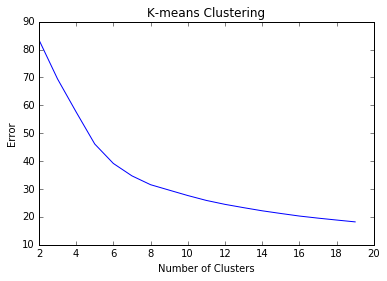

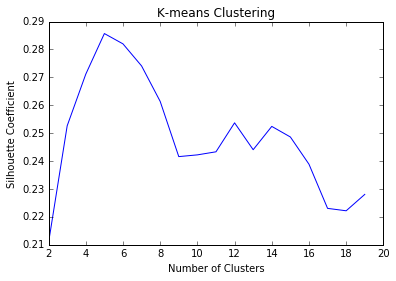



Analysis for Senior Management
Principal Components
component_0: accounting care financial audit department compliance residents living resident staff
component_1: sales care living community residents brookdale resident assisted home health
component_2: media marketing care living community social brand digital content agency
component_3: accounting media marketing financial audit summary cash tax investment content
component_4: marketing accounting financial media care director client community staff account


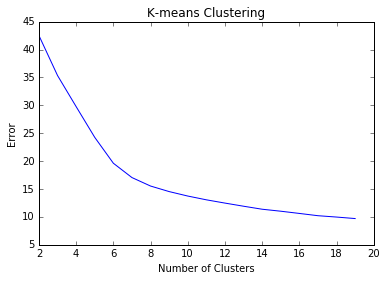

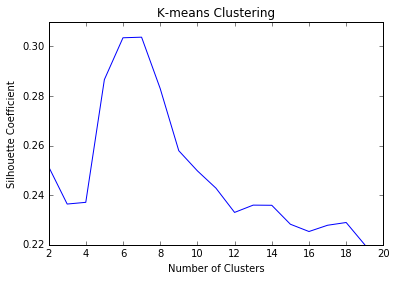



Analysis for Skilled Trade
Principal Components
component_0: handyman craftsman remodeler home contractor residential repair remodeling connection carpenter
component_1: sales handyman customer business remodeler marketing contractor craftsman home enterprise
component_2: sales customer craftsman maintenance work ability equipment customers repair skills
component_3: rio grande valley craftsman professional able work customer generate pediatrician
component_4: lush retail rio grande store valley handyman shop remodeler recruiting


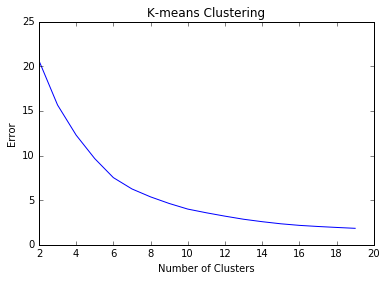

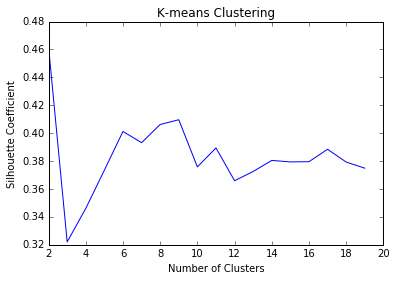



Analysis for Software Development/IT
Principal Components
component_0: test development data web testing code product team automation design
component_1: hiring avenue street francisco san york road market title network
component_2: security hiring project business information analyst management avenue analysis street
component_3: data business project customer team people clients sales work technology
component_4: hiring project test avenue business training customer sales qa york


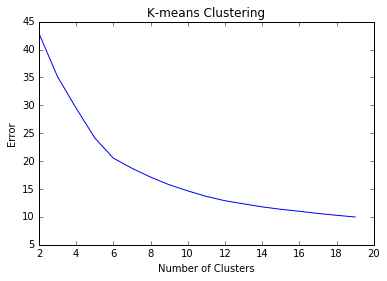

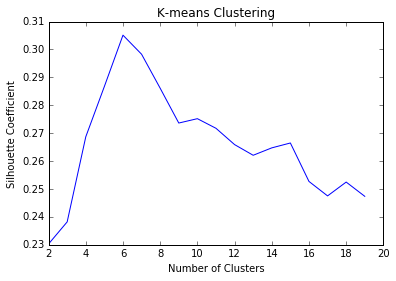



Analysis for Sports/Fitness
Principal Components
component_0: sales fitness marketing work skills business sports new management media
component_1: fitness personal training trainer members club exercise certification trainers school
component_2: sales fitness personal training members marketing business customer studio service
component_3: summary sales job position retail customer studio marketing manager entry
component_4: summary personal fitbit data fitness trainer training design trainers status
component_5: summary members fitbit member staff service studio program ymca customer
component_6: media summary marketing social personal content client training clients digital


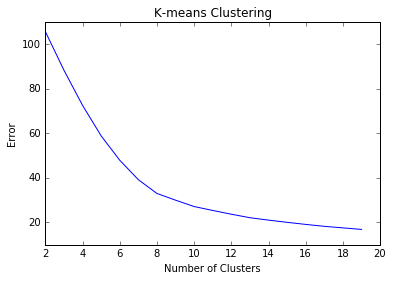

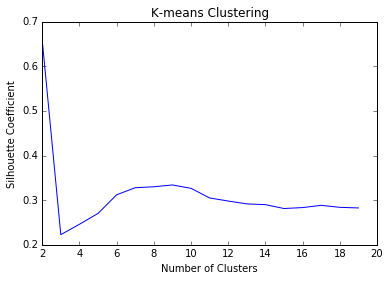



Analysis for Travel/Transportation
Principal Components
component_0: job school license drivers driver description cdl 00 safety summary
component_1: sales license driver territory 00 drivers school store equivalentrequired selling
component_2: marketing media event description york design content digital ll advertising
component_3: marketing event events office sales staff administrative executive media duties
component_4: project sales construction summary description job position projects design executive
component_5: project license work construction time home driver 00 drivers client


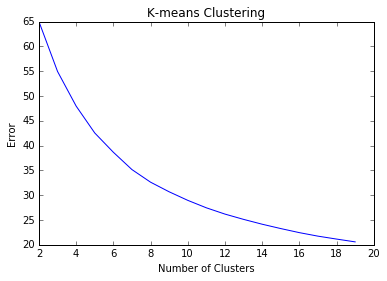

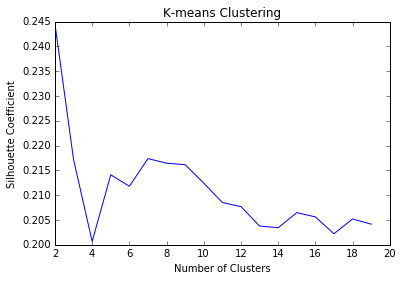



Analysis for Writing/Editing/Publishing
Principal Components
component_0: program technical support staff service legal required proposal project documents
component_1: video news internship interns students summary production looking stories editing
component_2: product content sales customer copy data technical team ll company
component_3: content news editor editorial program video grant stories web digital
component_4: students program fundraising development sales community grant marketing donor teaching
component_5: production work video team internship interns news new creative stories


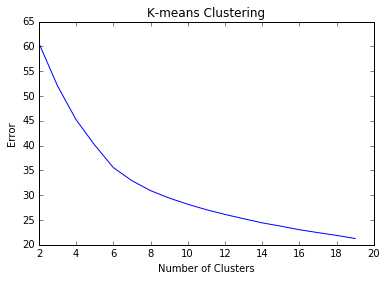

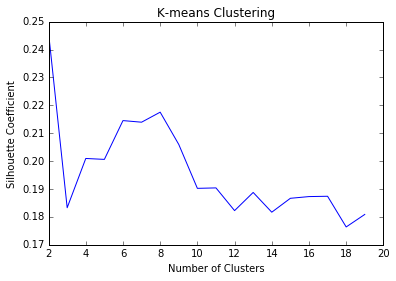



Analysis for Other


KeyError: 'Other'

In [6]:
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

def kmeans(X):
    MAX = 20
    error = np.zeros(MAX)
    sc = np.zeros(MAX)
    for k in range(2,MAX):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=100)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_
        sc[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    plt.title('K-means Clustering')
    plt.plot(range(2,MAX),error[2:])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Error')
    plt.show()
    plt.title('K-means Clustering')
    plt.plot(range(2,MAX),sc[2:])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Coefficient')
    plt.show()

def analyze(cluster_data):
    #print(cluster_data)
    #print("========================================")
    kmeans(cluster_data.ix[:,4:].values)

#for category in test_set:
for category in categories:
    print("========================================")
    print("Analysis for " + category)
    print("========================================")
    # retrieve information from dictionaries
    (df, u, s, vt) = data_set[category]
    pc_num = pc_num_dictionary[category]
    #pc_num = 10
    # print the top x terms in each principal component
    print("Principal Components")
    x = 10
    TERMS = vt.columns.values
    for i in range(0, pc_num):
        componenti = vt.iloc[i].tolist()
        top = np.argsort(componenti)
        topterms = []
        for j in range(0, x):
            topterms.append(TERMS[top[j]])
        print("component_" + str(i) + ": " + ' '.join(topterms))
    print("========================================")
    
    # prepare data for clustering
    Xk = u[:,:pc_num] @ np.diag(s[:pc_num])
    columns = []
    for i in range(0, pc_num):
        columns.append('component_' + str(i))
    Xk_df = DataFrame(Xk, index = df.index, columns = columns)
    cluster_data = pd.concat([df, Xk_df], axis=1, join='inner')
    analyze(cluster_data)
    print("\n")
